Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.


**Мягкий дедлайн:** 6 ноября 23:59

**Жесткий дедлайн:** 13 ноября 23:59

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [0]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [0]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [0]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [0]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [0]:
age_categories = [age_category(age) for age in data.Age]

In [0]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [0]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [29]:
# Ваш код здесь

#data.groupby(['Sex']).size().reset_index(name='counts') 

print(f"{len(data[(data['Sex']=='female')])} мужчин и {len(data[(data['Sex']=='male')])} женщин")


314 мужчин и 577 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [30]:
# Ваш код здесь

print(f"{data.groupby(['Pclass','Sex']).size()}\n\nмужчин 2-го класса было {len(data[(data['Pclass']==2) & (data['Sex']=='male')])} ")



Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
dtype: int64

мужчин 2-го класса было 108 


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [31]:
# Ваш код здесь 

print (f"Медиана – {round(data['Fare'].median(),2)}, стандартное отклонение – {round(data['Fare'].std(axis=0),2)}")



Медиана – 14.45, стандартное отклонение – 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [0]:
def age_category(age):

    if age < 30:
        return "Моложе 30 лет"
    elif age > 60:
        return "Старше 60 лет"
    else:
        return "Все остальные"

data['Age_category'] = data['Age'].apply(age_category)      

In [33]:
# Ваш код здесь

#data.groupby(['Age_category']).agg({'Survived': [np.mean]}).iloc[1,2]

for (i, sub_df) in data.groupby('Age_category'):
    print(f"группа \"{i}\", доля выживших - {round(sub_df['Survived'].mean() * 100,1)} %")



группа "Все остальные", доля выживших - 37.3 %
группа "Моложе 30 лет", доля выживших - 40.6 %
группа "Старше 60 лет", доля выживших - 22.7 %


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [34]:
# Ваш код здесь

for (i, sub_df) in data.groupby('Sex') :
    print(f"группа \"{i}\", доля выживших - {round(sub_df['Survived'].mean() * 100,1)} %")

группа "female", доля выживших - 74.2 %
группа "male", доля выживших - 18.9 %


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [35]:
# Ваш код здесь

import collections
top_name=[]

for i in data[(data['Sex']=='male')]['Name']:
    top_name.append(i[i.find('. ')+2:])

print(f'Cамое популярное имя среди пассажиров Титаника мужского пола - {collections.Counter(top_name).most_common(1)[0][0]}')


Cамое популярное имя среди пассажиров Титаника мужского пола - John


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

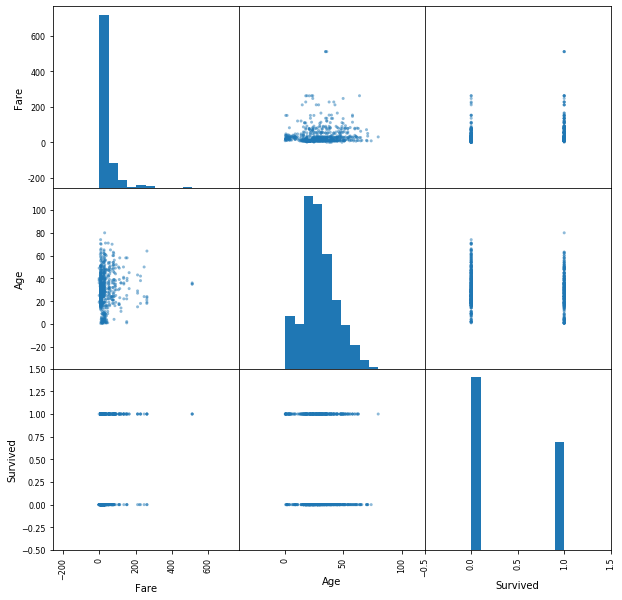

In [36]:
# Ваш код здесь

import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(data[['Fare','Age','Survived']], 
                  figsize=(10, 10), diagonal='hist', range_padding=1)
plt.show()

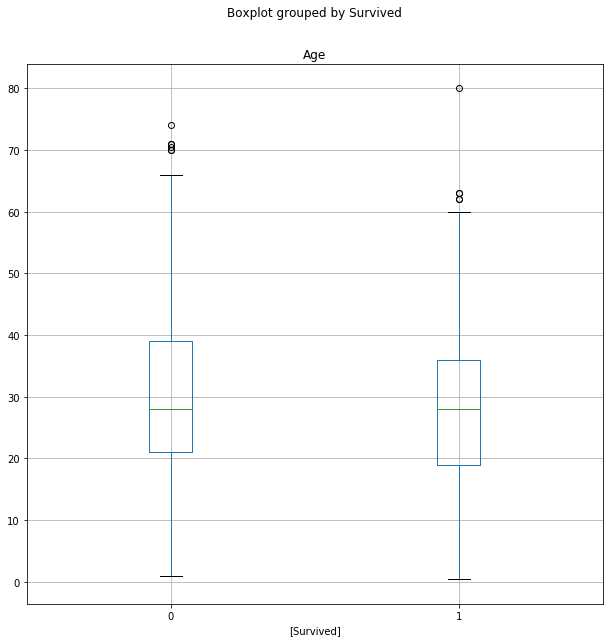

In [37]:

data.boxplot(column='Age',  by=['Survived'], 
           figsize=(10,10))
plt.show()

# Да, средний возраст погибших выше

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [38]:
# Ваш код здесь
# Группируем необходимые данные для проверки
# data.groupby(["Pclass", "Sex"])['Age'].mean()

a = data.groupby(["Pclass", "Sex"])['Age'].mean()
b = data.groupby(["Pclass"])['Age'].mean()
a,b

#Проверки ниже

(Pclass  Sex   
 1       female    34.611765
         male      41.281386
 2       female    28.722973
         male      30.740707
 3       female    21.750000
         male      26.507589
 Name: Age, dtype: float64, Pclass
 1    38.233441
 2    29.877630
 3    25.140620
 Name: Age, dtype: float64)

In [40]:
# В среднем мужчины 1-го класса старше 40 лет
# В среднем женщины 1-го класса старше 40 лет
# Мужчины всех классов в среднем старше женщин того же класса
# В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса
# Собственно сами проверки

if a[1][1] > 40:
   print('В среднем мужчины 1-го класса старше 40 лет - верно')
else:
   print('В среднем мужчины 1-го класса старше 40 лет - не верно')

if a[1][0] > 40:
   print('В среднем женщины 1-го класса старше 40 лет - верно')
else:
   print('В среднем женщины 1-го класса старше 40 лет - не верно')

cnt = 0
for i in range(1,3):
    if a[i][1] < a[i][0]:
       print('Мужчины всех классов в среднем старше женщин того же класса - не верно')
       cnt = 1
       break

if cnt == 0:
    print('Мужчины всех классов в среднем старше женщин того же класса - верно')

if b[1] > b[2] > b[3]:
    print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - верно')
else:
    print('В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - не верно')



В среднем мужчины 1-го класса старше 40 лет - верно
В среднем женщины 1-го класса старше 40 лет - не верно
Мужчины всех классов в среднем старше женщин того же класса - верно
В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса - верно
